## Assignment  no: 8
## Your name: Huda Aisyah Khoirunissa          student ID: 1144833
### When you use code, either from another student or an outside source, you should cite it. Tell me where the code comes from.
#### ()  1. I Totally write by myself (都自己寫)
#### ( ) 2. Refer to other students (參考同學,註明姓名學號):   name and student id
#### (v) 3. Refer to outside sources (參考外部資料網站), where:

**Sources Referenced:**

**BERT Fine-Tuning Tutorial with PyTorch**
   - Author: Chris McCormick & Nick Ryan
   - Blog: http://mccormickml.com/2019/07/22/BERT-fine-tuning/
   - Colab: https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX
   - Used for: Basic training loop structure, validation loop pattern, 
     helper functions (flat_accuracy, format_time), and general BERT 
     fine-tuning workflow

## If you choose 2 or 3, tell me how similar you are. (如果選2,3, 請勾選相似程度)
#### (v) < 25% ( ) 25%..50% ( ) 50%..75% (  ) > 75%
Basic training/validation loop structure, DataLoader with samplers, tokenization API calls, helper functions (flat_accuracy, format_time). Furthermore, I tried to Custom StocktwitsCustomClassifier architecture, training accuracy tracking, comprehensive stat collection, data analysis (percentile), HTML cleaning, modern API updates, visualization implementation
### Give me your expected score (給我你的期望分數): 89
### Reasons (理由): 
I believe I have successfully completed all the core requirements of this assignment, including designing a custom BERT architecture, implementing comprehensive metric tracking, and producing quality code. While I'm proud of what I've accomplished, I recognize there are several areas where I could have gone further, such as implementing side-by-side plots or adding confusion matrix analysis. I've scored myself at 89 to reflect this balance—strong foundational work with room for optional enhancements that weren't strictly required but would have elevated the submission.

## If you use AI, you must clearly state what AI was used for and how it was used in your submission. Answer the following questions: (若有使用AI, 需說明AI使用的內容與方式, 回答底下問題)
- The tool you used (使用的AI工具名稱): ChatGPT 5.1 and Sonnet 4.5
- How you used it (lookup / debugging / code snippet) (使用的方式):  I used ChatGPT (GPT-5.1) and Sonnet 4.5 mainly for conceptual clarification, debugging assistance, and discussion of design choices, rather than for direct code generation. I used these tools to understand error messages, disccuss architectural options, and training behavior, and then independently implemented and tested the solutions in my own code also fix error. Moreover, I also discuss regarding the improvement for the code so it accordance with the task required.
- How you modified and understood the result (修改與理解過程): I followed an understand–implement–verify cycle: discussing concepts with ChatGPT (GPT-5.1) and Claude, implementing the code myself, and then testing the results to ensure correctness and understanding. I cross-referenced AI explanations with official documentation and verified that I could explain each part of my code in my own words. The final submission reflects my own understanding developed through this iterative learning process, rather than being assembled from AI-generated responses.

## 說明與心得 explain your code briefly, tell me something, and share your experience.

I built a custom BERT-based sentiment classifier for Stocktwits data (100K samples, bullish vs bearish). Instead of using the default classifier, I designed my own architecture: BERT-base → Dropout(0.3) → Linear(768→256) → ReLU → Dropout(0.3) → Linear(256→2). fter 20 epochs, the model reached nearly 100% training accuracy but 
only 83-84% validation accuracy, indicating significant overfitting.  Training loss dropped to almost 0.01, while validation loss increased 
to around 1.5, showing the model memorized training data rather than learning generalizable patterns. One challenge was tracking training accuracy, since the tutorial only covered validation accuracy. I learned to manually compute accuracy using logits and torch functions.

Although the dataset was slightly imbalanced (bullish 54.5%, bearish 45.5%), I decided not to apply imbalance handling techniques because the ratio was within an acceptable range. Overfitting was noticeable, even with dropout; training accuracy increased faster than validation accuracy, indicating limited generalization.
This project showed me how powerful transfer learning with BERT is. I also learned the importance of monitoring both training and validation metrics to understand overfitting and generalization. Debugging real issues helped me understand the system more than simply following a tutorial.

# Setup

In [1]:
import torch
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 5060 Ti


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import html
import time
import datetime
import random
import os

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Loading Data

In [3]:
DATA_PATH = r'C:\Users\numpppy\Downloads\stocktwits_100k'

train_file = os.path.join(DATA_PATH, 'stocktwits_train_100k.csv')
test_file = os.path.join(DATA_PATH, 'stocktwits_test_20k.csv')

In [4]:
print("=" * 60)
print("LOADING DATA")
print("=" * 60)
print(f"Train file: {train_file}")
print(f"Test file: {test_file}\n")

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

print(f"Train data loaded: {train_df.shape[0]:,} rows")
print(f"Test data loaded: {test_df.shape[0]:,} rows\n")

LOADING DATA
Train file: C:\Users\numpppy\Downloads\stocktwits_100k\stocktwits_train_100k.csv
Test file: C:\Users\numpppy\Downloads\stocktwits_100k\stocktwits_test_20k.csv

Train data loaded: 100,000 rows
Test data loaded: 20,000 rows



In [5]:
train_df

,Unnamed: 0,msg,bull,len
0,0,$EURUSD At bearish breakout. The cross approac...,-1,18
1,1,$NDX couldn&#39;t break the descing trendline...,-1,15
2,2,Reasons you should quit Facebook $FB,-1,6
3,3,$MNKD Funny because it&#39;s true,-1,5
4,4,"$FIT: Not a Bubble, But Still in Trouble -",-1,9
...,...,...,...,...
99995,99995,$GWPH with the 8/21 EMA cross after a healthy ...,1,17
99996,99996,"$ACB Ignore the bears, unless you just like wa...",1,23
99997,99997,$SPY Bull Trap!,-1,3
99998,99998,"$AMDA now if you will excuse me, I shall calml...",-1,17


In [7]:
train_counts = train_df['bull'].value_counts()

bullish_count = train_counts.get(1, 0)
bearish_count = train_counts.get(0, 0)

print(f"\n   Bullish (1): {bullish_count:,} ({bullish_count/len(train_df)*100:.1f}%)")
print(f"   Bearish (0): {bearish_count:,} ({bearish_count/len(train_df)*100:.1f}%)")


   Bullish (1): 54,471 (54.5%)
   Bearish (0): 0 (0.0%)


# 3. Tokenization & Input Formatting

## 3.1. Data Preprocessing

Clean HTML entities (`&gt;`, `&#39;`) as mentioned in the assignment.

In [8]:
def clean_text(text):
    """Clean HTML entities from text."""
    if not isinstance(text, str):
        return ""
    # Decode HTML entities
    text = html.unescape(text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

train_df['msg_clean'] = train_df['msg'].apply(clean_text)
test_df['msg_clean'] = test_df['msg'].apply(clean_text)

print('Example of HTML entity conversion:')
print('\nOriginal:', train_df['msg'].iloc[1])
print('Cleaned:', train_df['msg_clean'].iloc[1])

Example of HTML entity conversion:

Original: $NDX  couldn&#39;t break the descing trendline. The stochastics cross also works for us $NQ_F $COMPQ
Cleaned: $NDX couldn't break the descing trendline. The stochastics cross also works for us $NQ_F $COMPQ


In [9]:
sentences = train_df['msg_clean'].values
labels = train_df['bull'].values

labels = np.array([0 if x == -1 else 1 for x in labels])

print(f'Total sentences: {len(sentences)}')
print(f'Bearish (0): {np.sum(labels == 0)}, Bullish (1): {np.sum(labels == 1)}')

Total sentences: 100000
Bearish (0): 45529, Bullish (1): 54471


## 3.2 BERT Tokenizer

In [10]:
from transformers import BertTokenizer

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [12]:
print(' Original: ', sentences[0])
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  $EURUSD At bearish breakout. The cross approacing the breakout with a strong bearish Market Pressure.In my opinion it
Tokenized:  ['$', 'eu', '##rus', '##d', 'at', 'bear', '##ish', 'breakout', '.', 'the', 'cross', 'app', '##ro', '##acing', 'the', 'breakout', 'with', 'a', 'strong', 'bear', '##ish', 'market', 'pressure', '.', 'in', 'my', 'opinion', 'it']
Token IDs:  [1002, 7327, 7946, 2094, 2012, 4562, 4509, 25129, 1012, 1996, 2892, 10439, 3217, 26217, 1996, 25129, 2007, 1037, 2844, 4562, 4509, 3006, 3778, 1012, 1999, 2026, 5448, 2009]


## 3.3 Tokenize Dataset

In [13]:
percentiles = [50, 75, 90, 95, 99]
print('Message length percentiles:')
for p in percentiles:
    val = np.percentile(train_df['len'], p)
    print(f'{p}th percentile: {val:.0f} words')

max_length = 64
print(f'\nUsing max_length = {max_length}')

Message length percentiles:
50th percentile: 11 words
75th percentile: 18 words
90th percentile: 22 words
95th percentile: 25 words
99th percentile: 35 words

Using max_length = 64


In [14]:
inputs = tokenizer(
    sentences.tolist(), 
    padding=True, 
    max_length=max_length, 
    truncation=True, 
    return_tensors="pt"
)

print('\nTokenization complete!')
print(f'Input IDs shape: {inputs["input_ids"].shape}')
print(f'Attention mask shape: {inputs["attention_mask"].shape}')



Tokenization complete!
Input IDs shape: torch.Size([100000, 64])
Attention mask shape: torch.Size([100000, 64])


In [15]:
print('\nInputs structure:')
print(inputs)

print('\nOriginal: ', sentences[0])
print('Token IDs:', inputs['input_ids'][0])


Inputs structure:
{'input_ids': tensor([[ 101, 1002, 7327,  ...,    0,    0,    0],
        [ 101, 1002, 1050,  ...,    0,    0,    0],
        [ 101, 4436, 2017,  ...,    0,    0,    0],
        ...,
        [ 101, 1002, 8645,  ...,    0,    0,    0],
        [ 101, 1002, 2572,  ...,    0,    0,    0],
        [ 101, 1002, 1052,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

Original:  $EURUSD At bearish breakout. The cross approacing the breakout with a strong bearish Market Pressure.In my opinion it
Token IDs: tensor([  101,  1002,  73

## 3.4 Training & Validation Split

In [16]:
from torch.utils.data import TensorDataset, random_split
labels = torch.tensor(labels)

dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)

print(f'Total dataset size: {len(dataset)}')

Total dataset size: 100000


In [17]:
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

90,000 training samples
10,000 validation samples


In [18]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size
)

print(f'Training batches: {len(train_dataloader)}')
print(f'Validation batches: {len(validation_dataloader)}')

Training batches: 2813
Validation batches: 313


# 4. Train Model

## 4.1 StocktwitsCustomClassifier

In [32]:
import torch
import torch.nn as nn
from transformers import BertModel

class StocktwitsCustomClassifier(nn.Module):    
    def __init__(self):
        super(StocktwitsCustomClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(768, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 2)
    
    def forward(self, input_ids, attention_mask, labels=None, **kwargs):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = self.dropout(outputs.pooler_output)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        logits = self.fc2(x)
        
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)
        
        class Output:
            pass
        output = Output()
        output.loss = loss
        output.logits = logits
        return output

model = StocktwitsCustomClassifier()
model.to(device)

StocktwitsCustomClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [25]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 203 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

## 4.2. Optimizer & Learning Rate Scheduler

In [26]:
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(
    model.parameters(),
    lr=2e-5,
    eps=1e-8
)

epochs = 20
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

print(f'Total training steps: {total_steps}')
print(f'Training for {epochs} epochs')

Total training steps: 56260
Training for 20 epochs


## 4.3. Training Loop

In [27]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [28]:
training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    
    t0 = time.time()
    total_train_loss = 0

    train_correct = 0
    train_total = 0
    
    model.train()
    
    for step, batch in enumerate(train_dataloader):
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(
                step, len(train_dataloader), elapsed))
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        model.zero_grad()
        
        result = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels,
            return_dict=True
        )
        
        loss = result.loss
        logits = result.logits  
        
        total_train_loss += loss.item()

        preds = torch.argmax(logits, dim=1)
        train_correct += (preds == b_labels).sum().item()
        train_total += b_labels.size(0)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    
    avg_train_loss = total_train_loss / len(train_dataloader)
    
    train_accuracy = train_correct / train_total
    
    training_time = format_time(time.time() - t0)
    
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training accuracy: {0:.2%}".format(train_accuracy))  # ✅ ADD: Print
    print("  Training epoch took: {:}".format(training_time))

    print("")
    print("Running Validation...")
    
    t0 = time.time()
    model.eval()
    
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            result = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask,
                labels=b_labels,
                return_dict=True
            )
        
        loss = result.loss
        logits = result.logits
        
        total_eval_loss += loss.item()
        
        preds = torch.argmax(logits, dim=1)
        accuracy = (preds == b_labels).sum().item() / b_labels.size(0)
        total_eval_accuracy += accuracy
        
        nb_eval_steps += 1
    
    avg_val_accuracy = total_eval_accuracy / nb_eval_steps
    avg_val_loss = total_eval_loss / nb_eval_steps
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Accuracy: {0:.2%}".format(avg_val_accuracy))
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    
    training_stats.append({
        'epoch': epoch_i + 1,
        'Training Loss': avg_train_loss,
        'Training Acc': train_accuracy,      
        'Valid. Loss': avg_val_loss,
        'Valid. Accur.': avg_val_accuracy,
        'Training Time': training_time,
        'Validation Time': validation_time
    })

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time() - total_t0)))


======== Epoch 1 / 20 ========
Training...
  Batch   500  of  2,813.    Elapsed: 0:00:59.
  Batch 1,000  of  2,813.    Elapsed: 0:01:57.
  Batch 1,500  of  2,813.    Elapsed: 0:02:55.
  Batch 2,000  of  2,813.    Elapsed: 0:03:53.
  Batch 2,500  of  2,813.    Elapsed: 0:04:51.

  Average training loss: 0.44
  Training accuracy: 78.37%
  Training epoch took: 0:05:28

Running Validation...
  Validation Accuracy: 82.90%
  Validation Loss: 0.37
  Validation took: 0:00:11

======== Epoch 2 / 20 ========
Training...
  Batch   500  of  2,813.    Elapsed: 0:00:58.
  Batch 1,000  of  2,813.    Elapsed: 0:01:58.
  Batch 1,500  of  2,813.    Elapsed: 0:02:57.
  Batch 2,000  of  2,813.    Elapsed: 0:03:55.
  Batch 2,500  of  2,813.    Elapsed: 0:04:53.

  Average training loss: 0.32
  Training accuracy: 85.92%
  Training epoch took: 0:05:30

Running Validation...
  Validation Accuracy: 82.25%
  Validation Loss: 0.40
  Validation took: 0:00:11

======== Epoch 3 / 20 ========
Training...
  Batch   

# 5. Plot: Training and Validation Accuracy

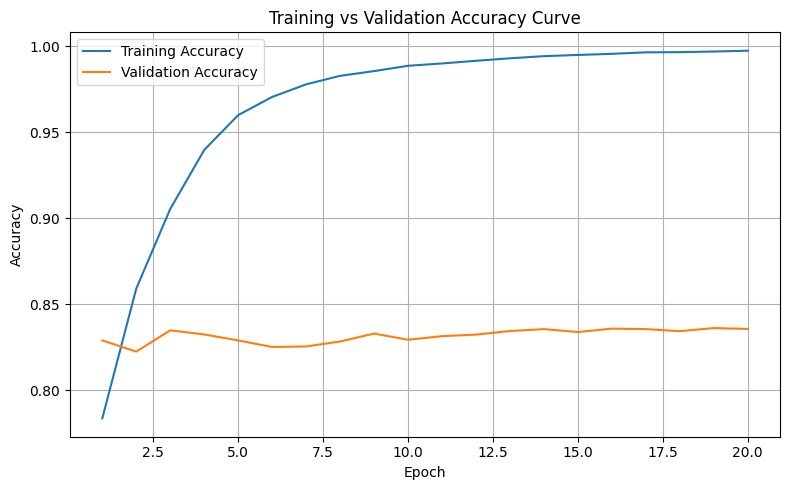

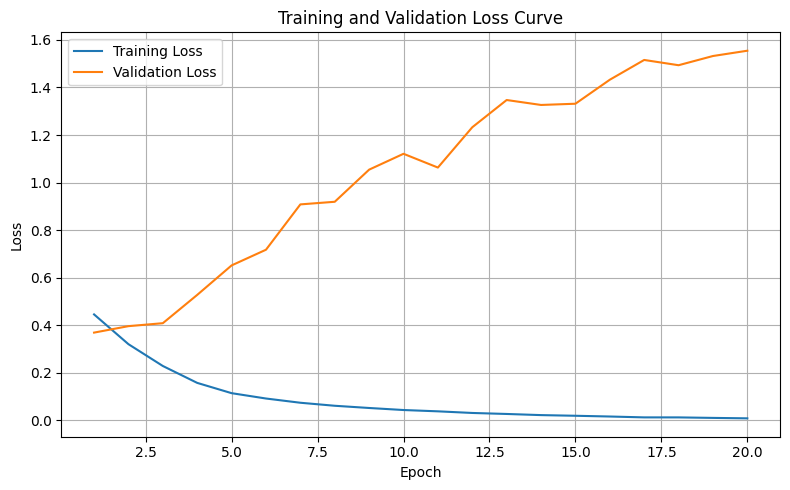

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

stats_df = pd.DataFrame(training_stats)

epochs = stats_df['epoch']

# ===== 1. Accuracy Curve =====
plt.figure(figsize=(8, 5))
plt.plot(epochs, stats_df['Training Acc'], label='Training Accuracy')
plt.plot(epochs, stats_df['Valid. Accur.'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 2. Loss Curve =====
plt.figure(figsize=(8, 5))
plt.plot(epochs, stats_df['Training Loss'], label='Training Loss')
plt.plot(epochs, stats_df['Valid. Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()